# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import  accuracy_score,f1_score,precision_score,recall_score
import seaborn as sns
import pickle as pl


# Importing the dataset into dataframe

In [2]:
data_full = pd.read_csv('creditcard.csv')
print(data_full.shape)
data_full

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Standardization

In [3]:
from sklearn.preprocessing import StandardScaler

data_full['normAmount'] = StandardScaler().fit_transform(data_full['Amount'].values.reshape(-1, 1))
data_full = data_full.drop(['Time', 'Amount'], axis=1)
data_full # The columns need to be in similar scale.Can be acheived by Standarization

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


# Splitting the dataset for test and validation accuracy

In [4]:
data=data_full.iloc[0:256326,:]
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256321,-1.994580,-1.635319,1.006695,-1.433183,3.259194,4.008239,-1.660020,1.099466,1.919685,-0.518544,...,-0.258971,0.080971,-0.579908,0.830054,-0.462078,0.437226,-0.170401,0.017564,0,-0.282863
256322,1.919950,-0.529575,-0.291774,0.644989,-0.766757,-0.384374,-0.616882,-0.030380,1.250724,0.013274,...,0.239401,0.864998,0.078354,-0.109595,-0.197549,0.455488,-0.008264,-0.041418,0,-0.185550
256323,-0.356158,1.191407,-0.437619,1.173899,0.525368,-0.471524,0.199218,0.239205,-0.757000,-0.433462,...,-0.182842,-0.552938,0.033595,0.614989,-0.986868,0.524162,-0.019874,0.100141,0,-0.345313
256324,2.025835,-0.046070,-1.249393,0.274412,-0.027561,-1.099714,0.154687,-0.263755,0.335313,0.185335,...,0.302148,1.003410,-0.000059,0.113962,0.224938,-0.133709,-0.023353,-0.068055,0,-0.349671


In [5]:
data_val=data_full.iloc[256326:284807,:]
data_val

#pratyush ends here

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
256326,1.985106,0.398793,-2.451505,1.462487,1.035466,-0.846500,0.679494,-0.305204,0.198212,-0.363112,...,-0.038611,0.008407,-0.037846,0.383466,0.482723,-0.511534,-0.009908,-0.019809,0,-0.200622
256327,-0.374887,-4.117293,-4.187522,1.183738,-0.310090,-0.899450,2.725253,-0.949894,-0.171054,-0.383950,...,1.015104,0.086303,-1.426768,-0.596596,0.204410,0.927533,-0.398025,0.125555,0,4.988214
256328,-0.041673,0.712444,0.335351,-0.670760,0.428873,-0.811848,0.810955,0.007803,-0.190866,-0.223122,...,-0.203472,-0.485264,0.089008,-0.010075,-0.570358,0.123357,0.240496,0.086646,0,-0.345313
256329,-0.832503,0.682724,1.022189,-0.717397,0.427839,1.585504,-0.335735,1.113388,0.019252,-1.051411,...,0.000010,-0.032568,-0.033124,-1.699208,-0.504059,-0.412187,0.073561,0.052377,0,-0.337277
256330,2.254208,-1.244813,-1.728640,-1.685269,-0.633272,-1.074740,-0.382061,-0.511530,-1.843693,1.613149,...,-0.303673,-0.567556,0.138124,-0.671258,-0.080240,-0.282735,-0.030580,-0.049971,0,-0.013392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


In [6]:
## Create a matrix for independent and dependent variables.
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape)) 

Shape of X: (256326, 29)
Shape of y: (256326, 1)


In [7]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# splitting datset into train and test
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (179428, 29)
Number transactions y_train dataset:  (179428, 1)
Number transactions X_test dataset:  (76898, 29)
Number transactions y_test dataset:  (76898, 1)


In [8]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': [324]
Before OverSampling, counts of label '0': [179104] 



# Applying SMOTE

In [9]:
sm = SMOTE(random_state=2) # using SMOTE
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
# now the major and minor classes gets balanced equally
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

#devyanshi ends here

After OverSampling, the shape of train_X: (358208, 29)
After OverSampling, the shape of train_y: (358208,) 

After OverSampling, counts of label '1': 179104
After OverSampling, counts of label '0': 179104


# Training the Model

In [10]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_res,y_train_res)
print("Model Trained")


Model Trained


### Storing the Model

In [11]:
filename = "Model.pkl"  
with open(filename, 'wb') as file:  
    pl.dump(classifier, file)
    
with open(filename, 'rb') as file:  
    Model = pl.load(file)

Model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Validation Accuracy

In [12]:
yPred = Model.predict( X_test) 
acc = accuracy_score( y_test, yPred)
print("Validation Accuracy is:{}".format(acc))
f1 = f1_score(y_test, yPred) 
print("F1 Score is:{}".format(f1))
prec = precision_score(y_test, yPred) 
print("Precision is:{}".format(prec))
rec=recall_score(y_test,yPred)
print("Recall is:{}".format(rec))

Validation Accuracy is:0.9995968685791567
F1 Score is:0.8872727272727272
Precision is:0.9457364341085271
Recall is:0.8356164383561644


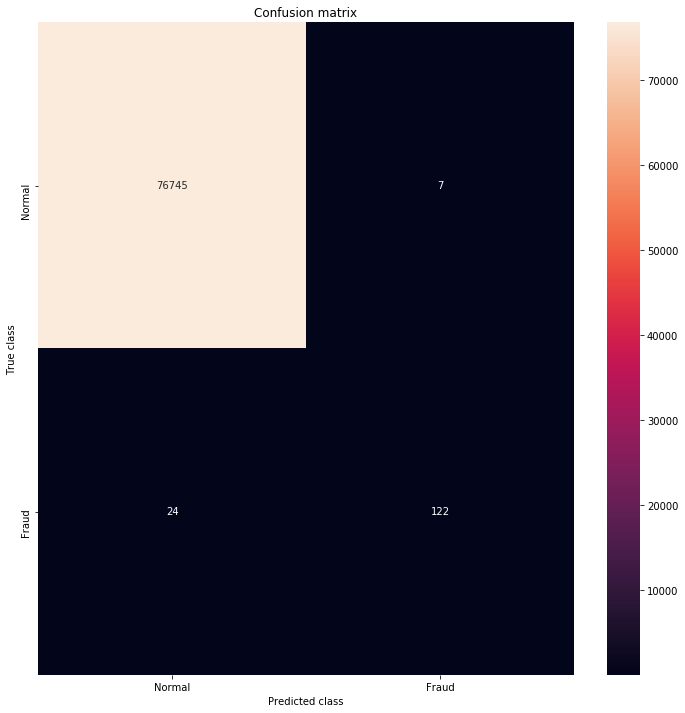

In [13]:
LABELS = ['Normal', 'Fraud'] 
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yPred)
plt.figure(figsize =(12, 12)) 
sns.heatmap(cm, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class')
plt.xlabel('Predicted class') 
plt.show() 

# Testing Accuracy

In [14]:
X1 = np.array(data_val.iloc[:, data_val.columns != 'Class'])
y1 = np.array(data_val.iloc[:, data_val.columns == 'Class'])
print('Shape of X: {}'.format(X1.shape))
print('Shape of y: {}'.format(y1.shape)) 

Shape of X: (28481, 29)
Shape of y: (28481, 1)


In [15]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.75, random_state=0)
print("Number transactions X_train dataset: ", X1_train.shape)
print("Number transactions y_train dataset: ", y1_train.shape)
print("Number transactions X_test dataset: ", X1_test.shape)
print("Number transactions y_test dataset: ", y1_test.shape)

Number transactions X_train dataset:  (7120, 29)
Number transactions y_train dataset:  (7120, 1)
Number transactions X_test dataset:  (21361, 29)
Number transactions y_test dataset:  (21361, 1)


In [16]:
yPred1 = Model.predict( X1_test) 
acc = accuracy_score( y1_test, yPred1)
print("Testing Accuracy is:{}".format(acc))
f1 = f1_score(y1_test, yPred1) 
print("F1 Score is:{}".format(f1))
prec = precision_score(y1_test, yPred1) 
print("Precision is:{}".format(prec))
rec=recall_score(y1_test,yPred1)
print("Recall is:{}".format(rec))


Testing Accuracy is:0.9996722999859557
F1 Score is:0.7999999999999999
Precision is:0.7777777777777778
Recall is:0.8235294117647058


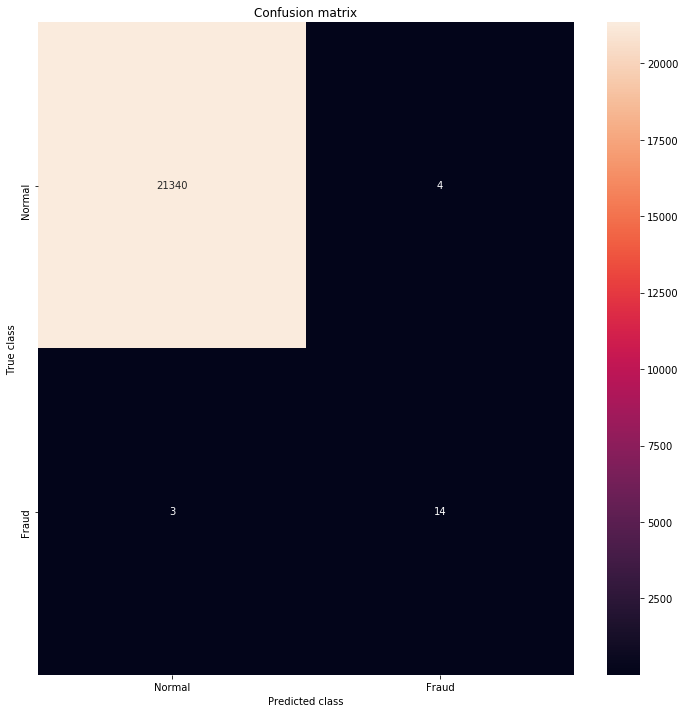

In [17]:
LABELS = ['Normal', 'Fraud'] 
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, yPred1)
plt.figure(figsize =(12, 12)) 
sns.heatmap(cm, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class')
plt.xlabel('Predicted class') 
plt.show() 